# Support Moments Trial 1
This notebook was used to generate the figures for gluex-doc-6084, "Support vector moments of acceptance-corrected angular distributions from multi-particle experimental data". The data used for this trial are served over xrootd from root://cn440.storrs.hpc.uconn.edu/Gluex/resilient/simulation/moments-6-2023. At the present time, the Jlab jupyterhub servers are blocked from accessing the internet, so these data have been copied to the following directory on the Jlab work disk. If you are running this notebook on your local laptop, you may need to change the setting of datadir to point to a location that is reachable on your platform.

In [1]:
import ROOT
import h5py
import numpy as np
import sys
import os
from concurrent.futures import ThreadPoolExecutor
import uproot

upcache = {}

#datadir = "root://cn440.storrs.hpc.uconn.edu/Gluex/resilient/simulation/moments-6-2023"
datadir = "/work/halld/jonesrt/simulation/moments-6-2023"
if os.path.isdir(datadir):
    print("datadir is accessible, you can continue")
else:
    print("datadir is not accessible, please change datadir to point to a reachable copy of the trial data")

Welcome to JupyROOT 6.22/06
datadir is accessible, you can continue


In [2]:
%pip install --user git+https://github.com/rjones30/gluex_moments_analysis.git

  Cloning https://github.com/rjones30/gluex_moments_analysis.git to /tmp/pip-req-build-ck7f1xhf
  Running command git clone -q https://github.com/rjones30/gluex_moments_analysis.git /tmp/pip-req-build-ck7f1xhf
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gluex_moments_analysis.analyzeMomentsMatrix as ana
ana.workdir = datadir

usage: >>> import buildMomentsMatrix as bmm
  >>> bmm.open('etapi0_moments_0.root:etapi0_moments')
  >>> acc_events = bmm.select_events(massEtaPi0_limits=(1.2,1.5), abst_limits=(0,0.2))
  >>> M,Mvar = bmm.buildMomentsMatrix_sequential(acc_events)
  >>> bmm.open('etapi0_moments_1.root:etapi0_moments')
  >>> acc_events2 = bmm.select_events(massEtaPi0_limits=(1.2,1.5), abst_limits=(0,0.2))
  >>> M2,Mvar2 = bmm.buildMomentsMatrix_threaded(acc_events2)
  >>> M += M2
  >>> Mvar += Mvar2
  >>> acc_events += acc_events2
  >>> # more of the above, till all accepted moments trees are read ...
  >>> bmm.open('generated_moments.root:etapi0_moments')
  >>> gen_events=bmm.select_events(massEtaPi0_limits=(1.2,1.5), abst_limits=(0,0.2))
  >>> outfile = 'save_moments_matrix.h5')
  >>> bmm.save_output(M, Mvar, acc_events, gen_events, outfile)
usage: >>> import analyzeMomentsMatrix.py as ana
 >>> ana.open("filename.h5")
 >>> h = ana.histogram_M_diagonal()
 >>> h = ana.histogram_M_diagonal_GJ0()
 >>> h = 

## Figure 1. 
The Monte Carlo sample used in this trial was generated for the reaction &gamma;p&rarr;&eta;&pi;<sup>0</sup>p with a broad invariant mass distribution of the &eta;&pi;<sup>0</sup> system peaking at 1.5 GeV. The t-slope for the reaction was set to 1 GeV<sup>2</sup>. To plot the generated distributions in these variables, I access a root tree named etapi0_moments that was produced using the code in generated_moments.C (see github repository containing all code used in this trial at https://github.com/rjones30/gluex_moemnts_analysis.git) running over the full set of 100 million generated &eta;&pi;<sup>0</sup>p events in chunks of 10 million event. The output trees are saved in generated_moments_x10_<em>n</em>.root where <em>n</em>=0..9. Here I list the contents of all columns in the etapi0_moments tree.

In [4]:
fgen0 = ROOT.TFile(datadir + "/generated_moments_x10_0.root")
gen_tree = fgen0.Get("etapi0_moments")
gen_tree.Print()

******************************************************************************
*Tree    :etapi0_moments: eta pi0 moments                                        *
*Entries : 10000000 : Total =     43082892947 bytes  File  Size = 32293475890 *
*        :          : Tree compression factor =   1.33                       *
******************************************************************************
*Br    0 :runNo     : runNo/L                                                *
*Entries : 10000000 : Total  Size=   80110371 bytes  File Size  =     561047 *
*Baskets :     1079 : Basket Size=     106496 bytes  Compression= 142.75     *
*............................................................................*
*Br    1 :eventNo   : eventNo/L                                              *
*Entries : 10000000 : Total  Size=   80112537 bytes  File Size  =   15504090 *
*Baskets :     1079 : Basket Size=     107008 bytes  Compression=   5.17     *
*..............................................

The &eta; and &pi;<sup>0</sup> are each reconstructed from their 2&gamma; decays seen in the GlueX detector. The graphs in figure 2 show that after the kinematic fit cut there is a negligible amount of background under both peaks in the 2&gamma; invariant mass spectra. To see the reconstructed mass distributions, we need to access the simulation output events. These data are stored in files named etapi0_moments_x10_<em>n</em>.root, with <em>n</em>=0..9. In the reconstructed tree, several columns are repeated twice, once with an underscore (generated quantities) and a second time without the underscore (reconstructed quantities) so that both types of information is available for all of the reconstructed events.

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


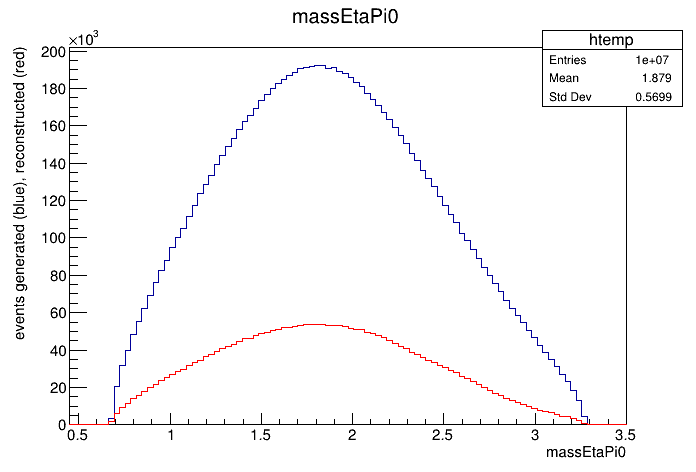

In [5]:
frec0 = ROOT.TFile(datadir + "/etapi0_moments_x10_0.root")
rec_tree = frec0.Get("etapi0_moments")
#rec_tree.Print()

gen_tree.Draw("massEtaPi0")
h1 = ROOT.gROOT.FindObject("htemp")
h1.GetYaxis().SetTitle("events generated (blue), reconstructed (red)")
h2 = h1.Clone('h2')
h2.SetLineColor(2)
rec_tree.Draw("massEtaPi0>>h2", "", "same")
c1 = ROOT.gROOT.FindObject("c1")
c1.Draw()

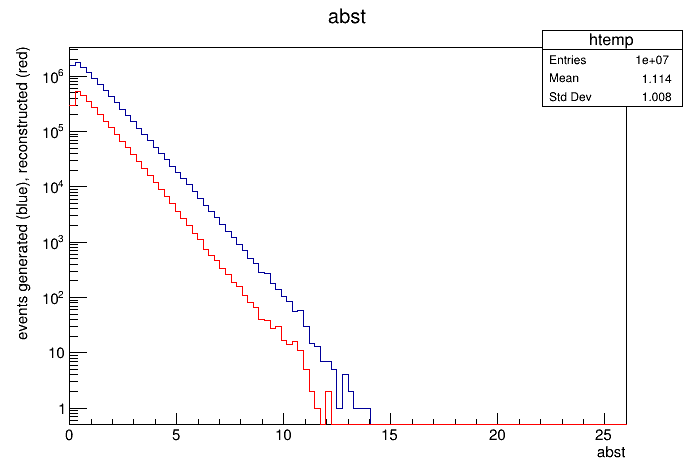

In [6]:
gen_tree.Draw("abst")
h1 = ROOT.gROOT.FindObject("htemp")
h1.GetYaxis().SetTitle("events generated (blue), reconstructed (red)")
c1.SetLogy()
h2 = h1.Clone('h2')
h2.SetLineColor(2)
rec_tree.Draw("abst>>h2", "", "same")
c1.Draw()

## Figure 2
The &eta; and &pi;<sup>0</sup> are each reconstructed from their 2&gamma; decays seen in the GlueX detector. The graphs in figure 2 show that after the kinematic fit cut there is a negligible amount of background under both peaks in the 2&gamma; invariant mass spectra. To see the reconstructed mass distributions, we need to access the simulation output events. These data are stored in files named etapi0_moments_x10_<em>n</em>.root, with <em>n</em>=0..9.

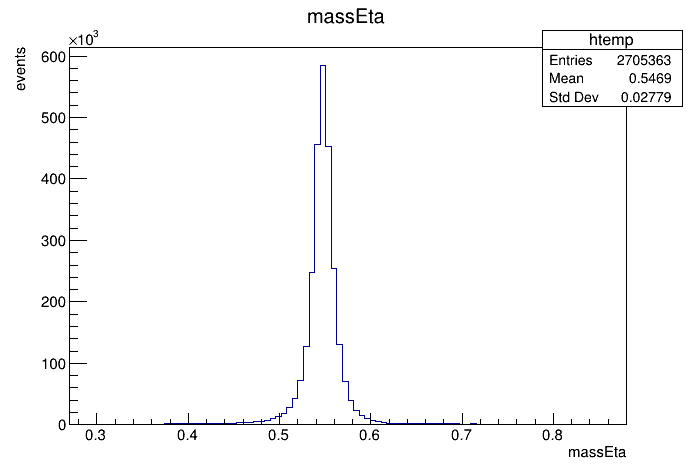

In [7]:
rec_tree.Draw("massEta")
h1 = ROOT.gROOT.FindObject("htemp")
h1.GetYaxis().SetTitle("events")
c1.SetLogy(0)
c1.Draw()

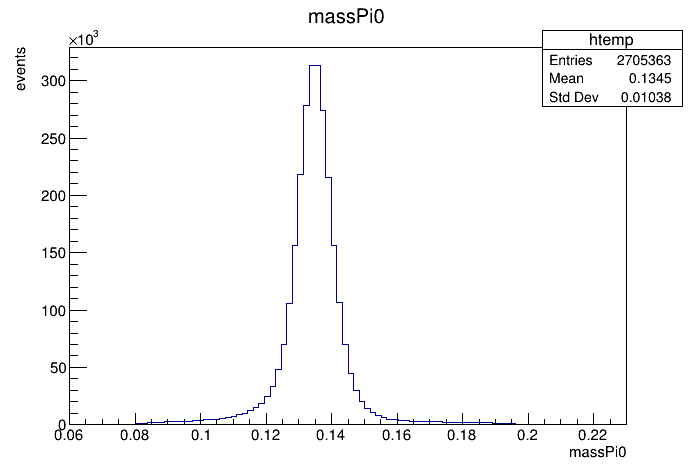

In [8]:
rec_tree.Draw("massPi0")
h1 = ROOT.gROOT.FindObject("htemp")
h1.GetYaxis().SetTitle("events")
c1.SetLogy(0)
c1.Draw()

## Mock data sample
The full set of 27.1 million reconstructed events is divided into two equal parts. The first 13.5 million are used to create a sample of mock data whose decay angular distributions are made to follow a made-up production cross section of the &eta;&pi;<sup>0</sup> system with angular moments that depend on both <em>m<sub>X</sub></em> and |<em>t</em>|. The model has been created to be deliberately complicated and obtuse so that the moments extraction algorithm is not advantaged by simplifiying assumptions. The following plots show the angular distribution of the decay angles &theta;<sub>GJ</sub>,&phi;<sub>GJ</sub> converted into moments by taking their inner product with the real spherical harmonics. The model has been constructed to have independent, non-zero moments up to and including L=3, for a total of 49 moments. The moments extraction algorithm does not have the luxury of knowing what this upper limit on the allowed values of L might be, so the goal is to extract all moments up to L=12, for a total of 169 moments.

## Figures 3-4
It is difficult to adequately visualize 49 model moments that vary strongly with both <em>m<sub>X</sub></em> and |<em>t</em>| over the full kinematic range shwon in Fig. 1. In figure 3 I select a few moments and plot their dependence on <em>m<sub>X</sub></em> for three different bins in |<em>t</em>|. Interested reviewer of these results are encouraged to explore this visualization further by modifying the code below to look at other moments and ranges in |<em>t</em>|.

In [9]:
# use uproot for faster access when calculations based on tree variables are needed
# if this crashes, restart your kernel with 16 cores, 64GB of ram allocation, or
# else reduce Ngen to limit the number of rows in the tree you load into memory at once.
columns = {"mom": "model1moment", "mX": "massEtaPi0", "|t|": "abst"}
gentree = uproot.open(datadir + "/generated_moments_x10_0.root:etapi0_moments")
decomp = ThreadPoolExecutor(16)
Ngen = 10000000
arrays = gentree.arrays(columns.values(), decompression_executor=decomp, entry_start=0, entry_stop=Ngen, array_cache=upcache, library="np")
model1mom = arrays[columns['mom']]
massX = arrays[columns['mX']]
abst = arrays[columns['|t|']]

moments_to_plot = range(49)
try:
    [hgen[i].Reset() for i in range(3)]
    [[hmodel[j][i].Reset() for i in range(3)] for j in moments_to_plot]
except:
    hgen = [ROOT.TH1D(f"hgen{i}", "", 50, 0.6, 2.6) for i in range(3)]
    hmodel = [[ROOT.TH1D(f"hmodel{i}{j}", "", 50, 0.6, 2.6) for i in range(3)] for j in moments_to_plot]
print(f"found {len(massX)} rows in gentree")
for iev in range(len(massX)):
    if abst[iev] > 0.2 and abst[iev] < 0.25:
        tbin = 0
    elif abst[iev] > 0.9 and abst[iev] < 1.0:
        tbin = 1
    elif abst[iev] > 1.6 and abst[iev] < 1.8:
        tbin = 2
    else:
        continue
    hgen[tbin].Fill(massX[iev])
    for j in moments_to_plot:
        hmodel[j][tbin].Fill(massX[iev], model1mom[iev][j])

found 10000000 rows in gentree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


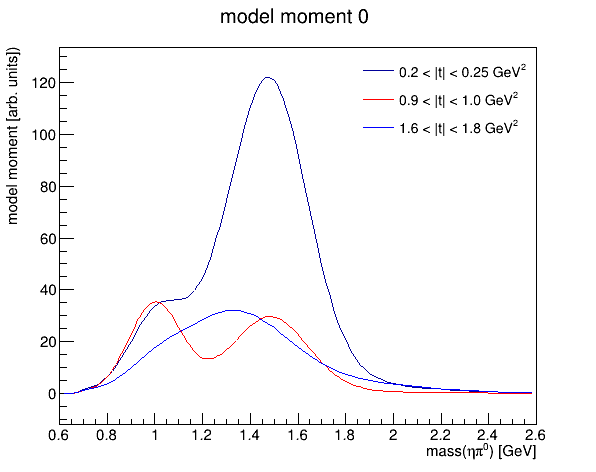

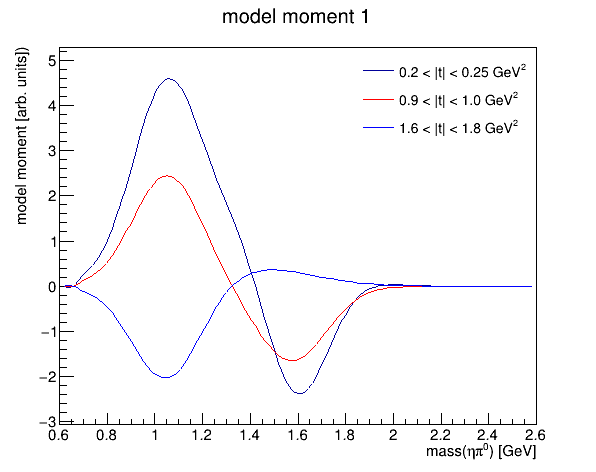

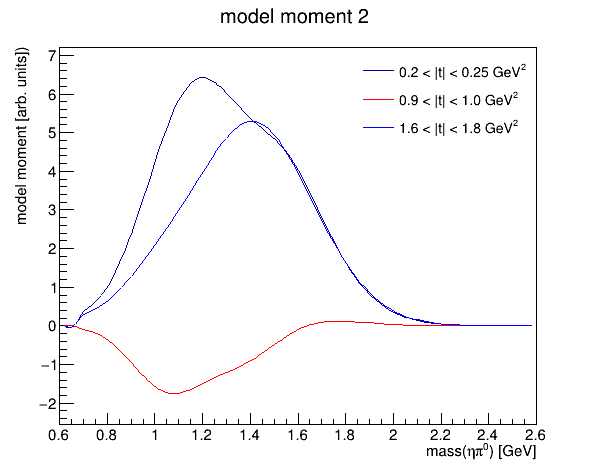

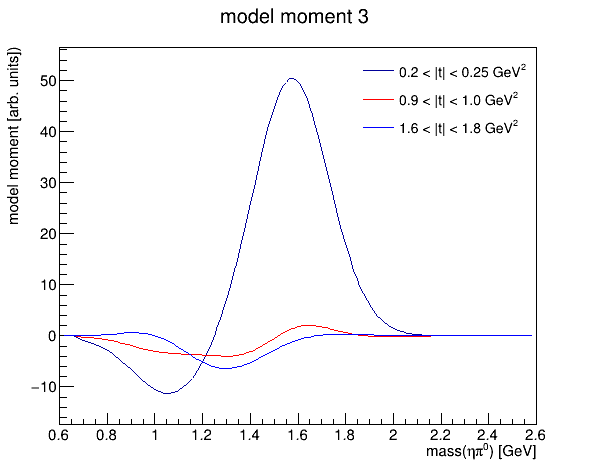

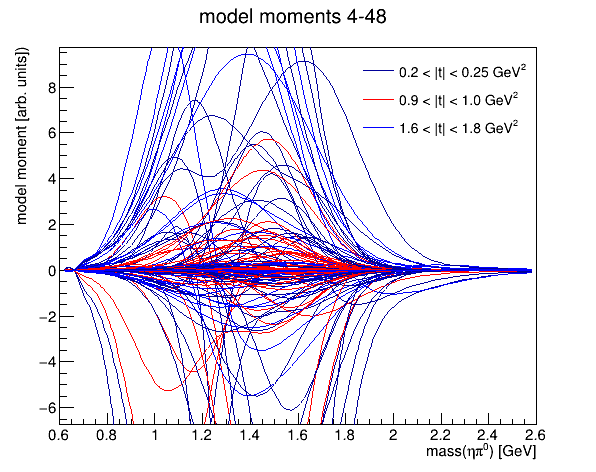

In [10]:
h = {}
c = {}
leg = {}
for j in moments_to_plot:
    h[j] = [hmodel[j][i].Clone() for i in range(3)]
    [h[j][i].Divide(hgen[i]) for i in range(3)]
    ymin = min([h[j][i].GetMinimum() for i in range(3)])
    ymax = max([h[j][i].GetMaximum() for i in range(3)])
    h[j][0].SetStats(0)
    h[j][0].SetTitle(f"model moment {j}")
    h[j][0].GetXaxis().SetTitle("mass(#eta#pi^{0}) [GeV]")
    h[j][0].GetYaxis().SetTitle("model moment [arb. units])")
    h[j][0].SetMaximum(ymax + (ymax - ymin) * 0.1)
    h[j][0].SetMinimum(ymin - (ymax - ymin) * 0.1)
    if j < 4:
        c[j] = ROOT.TCanvas(f"c{j}", f"c{j}", 600, 500)
        h[j][0].Draw("chist")
        canvas = j
    elif j == 4:
        h[j][0].SetTitle(f"model moments {j}-{max(moments_to_plot)}")
        h[j][0].SetMaximum(ymax + (ymax - ymin) * 0.2)
        h[j][0].SetMinimum(ymin - (ymax - ymin) * 0.2)
        c[j] = ROOT.TCanvas(f"c{j}", f"c{j}", 600, 500)
        h[j][0].Draw("chist")
        canvas = j
    else:
        h[j][0].Draw("chist same")
    h[j][1].SetLineColor(2)
    h[j][1].Draw("chist same")
    h[j][2].SetLineColor(4)
    h[j][2].Draw("chist same")
    leg[f"leg{j}"] = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
    leg[f"leg{j}"].AddEntry(h[j][0], "0.2 < |t| < 0.25 GeV^{2}", 'l')
    leg[f"leg{j}"].AddEntry(h[j][1], "0.9 < |t| < 1.0 GeV^{2}", 'l')
    leg[f"leg{j}"].AddEntry(h[j][2], "1.6 < |t| < 1.8 GeV^{2}", 'l')
    leg[f"leg{j}"].SetBorderSize(0)
    leg[f"leg{j}"].Draw()
    c[canvas].Draw()
        

## Figure 5.
The reconstructed events from the first 50 million generated &eta;&pi;<sup>0</sup> were used to create a mock data sample by weighting each event according to the model illustrated in figure3, and picking events at random according to their weight by a random process. The plots in figure 4 show the distribution of the mock data sample in generated <em>m<sub>X</sub></em> and |<em>t</em>|, demonstrating that the model has shaped the distributions of the reconstructed events in mass and <em>t</em> as well as in the decay anglular distributions.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


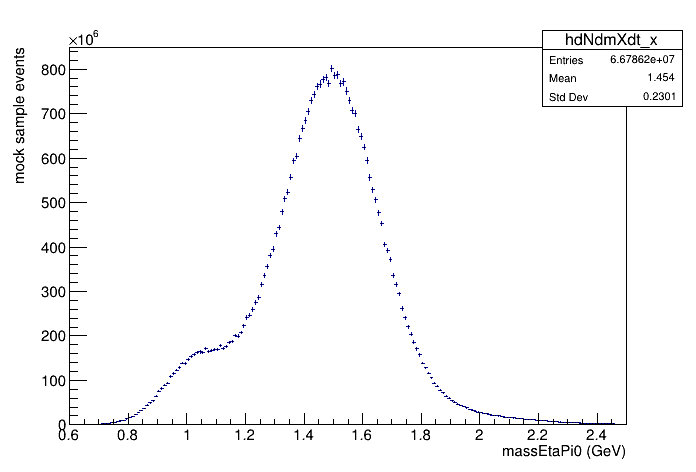

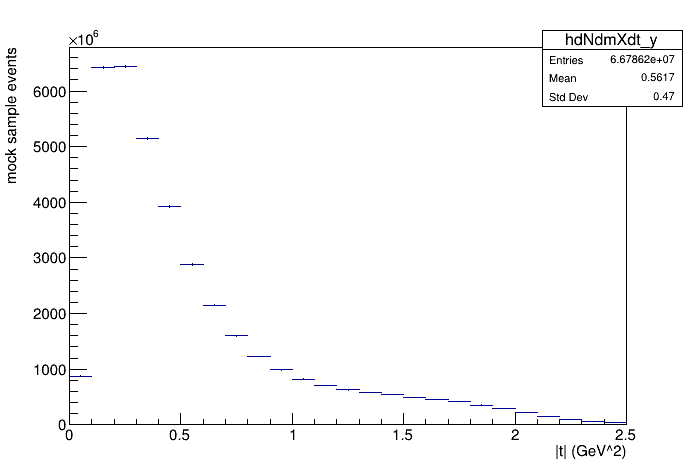

In [11]:
try:
    hdNdmXdt.Delete()
except:
    pass
for tbin,mbin in ana.standard_kinematic_bins(finebins=0):
    sampledir = datadir + "/etapi0_moments_{0},{1}_{2},{3}".format(mbin[0], mbin[1], tbin[0], tbin[1])
    fsample = ROOT.TFile(sampledir + "/Msample.root")
    h2dsample = fsample.Get("sample_0")
    f5sample = h5py.File(sampledir + "/Msample.h5")
    maxweight = f5sample['sample_maxweight'][()]
    try:
        hdNdmXdt.Add(h2dsample, maxweight)
    except:
        hdNdmXdt = h2dsample.Clone("hdNdmXdt")
        hdNdmXdt.Scale(maxweight)
        hdNdmXdt.SetDirectory(0)
hdNdmXdt.SetTitle("mock sample #eta,#pi^{0} mass distribution")
hdNdmXdt.Scale((4 * np.pi)**3)
c1 = ROOT.TCanvas("c1", "c1", 700, 500)
hdNdmXdt_x = hdNdmXdt.ProjectionX("hdNdmXdt_x")
hdNdmXdt_x.GetYaxis().SetTitle("mock sample events")
hdNdmXdt_x.SetTitle("")
hdNdmXdt_x.Draw()
c1.Draw()
c2 = ROOT.TCanvas("c2", "c2", 700, 500)
c2.cd()
hdNdmXdt_y = hdNdmXdt.ProjectionY("hdNdmXdt_y")
hdNdmXdt_y.GetYaxis().SetTitle("mock sample events")
hdNdmXdt_y.Draw()
hdNdmXdt_y.SetTitle("")
c2.Draw()

## Figure 6.

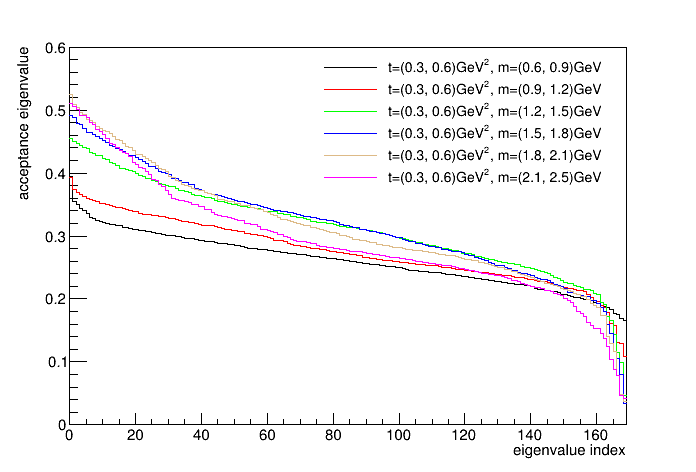

In [12]:
hacc_mX = {}
c1.cd()
leg = ROOT.TLegend(0.45, 0.6, 0.88, 0.88)
for tbin,mbin in ana.standard_kinematic_bins(finebins=0):
    if tbin == (0.3,0.6):
        sampledir = datadir + "/etapi0_moments_{0},{1}_{2},{3}".format(mbin[0], mbin[1], tbin[0], tbin[1])
        h5 = ana.open(sampledir + "/Msaved.h5")
        Ngen = h5['generated_subset'][()]
        ana.M *= (4 * np.pi)**3 / Ngen
        w,v = np.linalg.eigh(ana.M)
        name = f"hacc_mX{mbin}"
        hacc_mX[mbin] = ana.histogram_eigenvalues(name, "", w)
        plot = len(hacc_mX)
        if plot == 1:
            hacc_mX[mbin].SetStats(0)
            hacc_mX[mbin].SetMaximum(0.6)
            hacc_mX[mbin].SetMinimum(0.0)
            hacc_mX[mbin].SetLineColor(plot)
            hacc_mX[mbin].Draw()
            leg.AddEntry(hacc_mX[mbin], f"t={tbin}GeV^{{2}}, m={mbin}GeV", 'l')
        else:
            color = len(hacc_mX)
            if color == 5:
                color = 42
            hacc_mX[mbin].SetLineColor(color)
            hacc_mX[mbin].Draw("same")
            leg.AddEntry(hacc_mX[mbin], f"t={tbin}GeV^{{2}}, m={mbin}GeV", 'l')
leg.SetBorderSize(0)
leg.Draw()
c1.Draw()

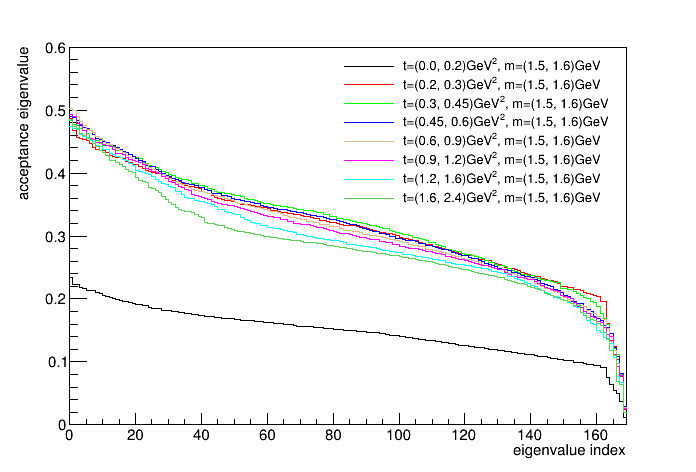

In [13]:
plot = 0
hacc_t = {}
c2.cd()
leg2 = ROOT.TLegend(0.48, 0.56, 0.88, 0.88)
for tbin,mbin in ana.standard_kinematic_bins(finebins=2):
    if mbin == (1.5,1.6):
        sampledir = datadir + "/etapi0_moments_{0},{1}_{2},{3}".format(mbin[0], mbin[1], tbin[0], tbin[1])
        h5 = ana.open(sampledir + "/Msaved.h5")
        Ngen = h5['generated_subset'][()]
        ana.M *= (4 * np.pi)**3 / Ngen
        w,v = np.linalg.eigh(ana.M)
        name = f"hacc_t{tbin}"
        hacc_t[tbin] = ana.histogram_eigenvalues(name, "", w)
        plot = len(hacc_t)
        if plot == 1:
            hacc_t[tbin].SetStats(0)
            hacc_t[tbin].SetMaximum(0.6)
            hacc_t[tbin].SetMinimum(0.0)
            hacc_t[tbin].SetLineColor(plot)
            hacc_t[tbin].Draw()
            leg2.AddEntry(hacc_t[tbin], f"t={tbin}GeV^{{2}}, m={mbin}GeV", 'l')
        else:
            color = len(hacc_t)
            if color == 5:
                color = 42
            hacc_t[tbin].SetLineColor(color)
            hacc_t[tbin].Draw("same")
            leg2.AddEntry(hacc_t[tbin], f"t={tbin}GeV^{{2}}, m={mbin}GeV", 'l')
leg2.SetBorderSize(0)
leg2.Draw()
c2.Draw()

## Figure 7

In [14]:
huncor,hcorr,hmodel,hgener = ana.model1_corrected_moments()

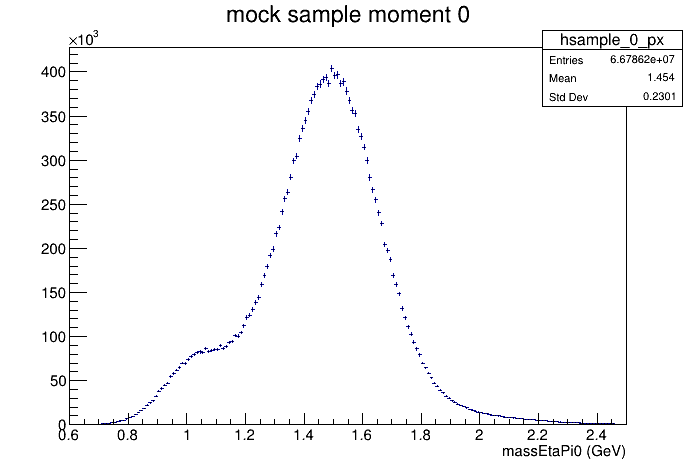

In [15]:
c1.cd()
hu = huncor[0].ProjectionX()
hu.Draw()
c1.Draw()

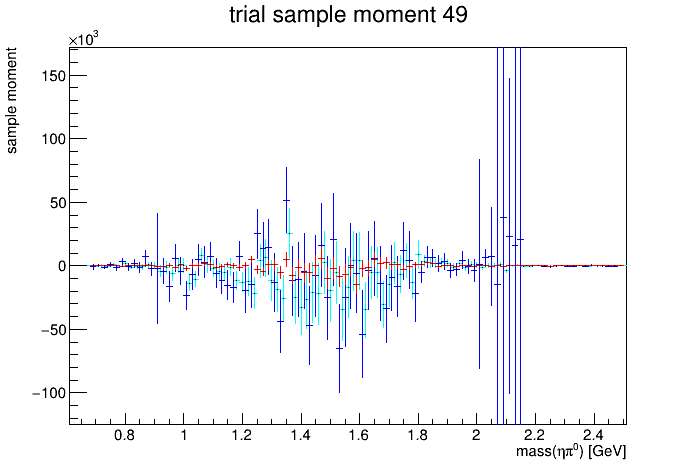

In [16]:
naive_acceptance = 0.26
offset_for_view_GeV = 0.01
c1.cd()
for imoment in [49]:
    hucm = [h.ProjectionX().Rebin(2) for h in (huncor[imoment], hcorr[imoment], hmodel[imoment])]
    hucm[0].Scale(1/naive_acceptance)
    nxbins = hucm[0].GetNbinsX()
    hu_shifted = ROOT.TH1D(hucm[0].GetName() + "_shifted", "", nxbins, 
                           hucm[0].GetXaxis().GetBinLowEdge(1) + offset_for_view_GeV, 
                           hucm[0].GetXaxis().GetBinUpEdge(nxbins) + offset_for_view_GeV)
    ymax,ymin = (0,0)
    for j in range(hucm[0].GetNbinsX()):
        hu_shifted.SetBinContent(j+1, hucm[0].GetBinContent(j+1))
        hu_shifted.SetBinError(j+1, hucm[0].GetBinError(j+1))
        for k in range(3):
            yval = hucm[k].GetBinContent(j+1)
            yerr = hucm[k].GetBinError(j+1)
            if yerr < 2e5:
                yup = yval + yerr
                ydown = yval - yerr
                ymax = max((ymax, yup))
                ymin = min((ymin, ydown))
    hu_shifted.SetTitle(f"trial sample moment {imoment}")
    hu_shifted.SetLineColor(7)
    hu_shifted.SetStats(0)
    hu_shifted.SetMaximum(ymax + (ymax - ymin) * 0.1)
    hu_shifted.SetMinimum(ymin - (ymax - ymin) * 0.1)
    hu_shifted.GetXaxis().SetTitle("mass(#eta#pi^{0}) [GeV]")
    hu_shifted.GetYaxis().SetTitle("sample moment")
    hu_shifted.Draw()
    hucm[1].SetLineColor(4)
    hucm[1].Draw("same")
    hucm[2].SetLineColor(2)
    hucm[2].Draw("same")
    c1.Draw()

## Figure 8

In [29]:
hcoarse = [[0,0]] * 5
for tcut in range(1,5):
    break # remove this statement to regenerate these figures, takes time!
    print(f"running ana.scan_em on tcut={tcut}", flush=True)
    hcoarse[tcut] = ana.scan_em(finebins=0, tcut=tcut, interactive=0)
    try:
        [hcoarse[0][i].Add(hcoarse[tcut][i]) for i in range(2)]
    except:
        hcoarse[0] = [hcoarse[tcut][i].Clone() for i in range(2)]

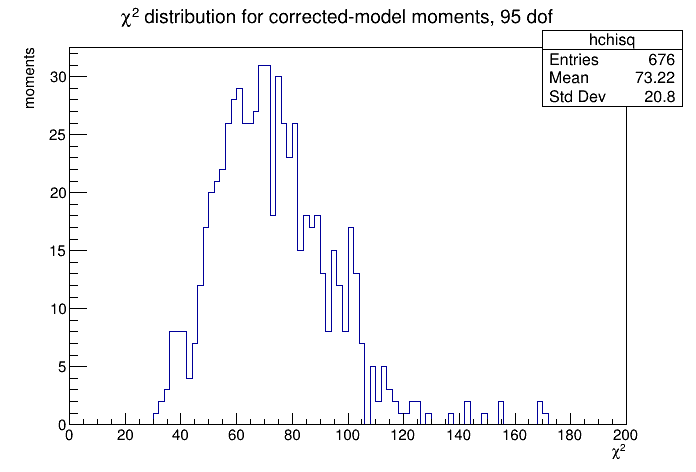

In [18]:
c1.cd()
hcoarse[0][0].Draw()
c1.Draw()

In [30]:
hfine = [[0,0]] * 9
for tcut in range(1,9):
    break # remove this statement to regenerate these figures, takes time!
    print(f"running ana.scan_em on tcut={tcut}", flush=True)
    hfine[tcut] = ana.scan_em(finebins=2, tcut=tcut, interactive=0)
    try:
        [hfine[0][i].Add(hfine[tcut][i]) for i in range(2)]
    except:
        hfine[0] = [hfine[tcut][i].Clone() for i in range(2)]

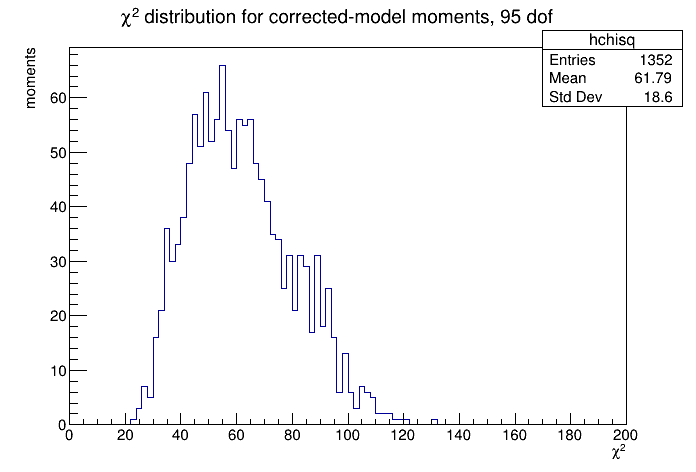

In [20]:
hfine[0][0].Draw()
c1.Draw()

In [21]:
import subprocess
subprocess.run(["ps", "-o", "pid,user,vsz,rss,time,comm,args"])

CompletedProcess(args=['ps', '-o', 'pid,user,vsz,rss,time,comm,args'], returncode=0)

   PID USER        VSZ   RSS     TIME COMMAND         COMMAND
235590 jonesrt  113292  1640 00:00:00 slurm_script    /bin/bash -l /var/spool/sl
235630 jonesrt  1005332 11668 00:00:00 starter-suid   Singularity runtime parent
235654 jonesrt    2500   392 00:00:00 tini            /opt/conda/bin/tini -g -- 
235677 jonesrt  402148 94992 00:00:14 batchspawner-si /opt/conda/bin/python3.8 /
253206 jonesrt  69152700 38205268 01:48:55 python     /opt/conda/bin/python -m i
258604 jonesrt    9128  1716 00:00:00 ps              ps -o pid,user,vsz,rss,tim
